In [1]:
%matplotlib inline
import math
from matplotlib import cm
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as spi
import re
#
figuresize = 8
plt.rcParams['figure.figsize'] = (1+math.sqrt(5))/2*figuresize, figuresize
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 20
plt.rcParams['font.family'] = "serif"
plt.rcParams['text.usetex'] = "True"

In [2]:
f = open('LA-UR-11-04757.inpm')
file = f.read()

In [3]:
# Capture x, y, and value arrays.
x = np.array(re.search(r's\s+(\d+).*?((-*\d\.\d+[Ee][+-]\d+\s+)+)', file, re.DOTALL).group(2).split(), dtype=np.float)
y = np.array(re.search(r'c\s+(\d+).*?((-*\d\.\d+[Ee][+-]\d+\s+)+)', file, re.DOTALL).group(2).split(), dtype=np.float)
vu = np.array(re.search(r'vals.*?((-*\d\.\d+[Ee][+-]\d+\s+\d\.\d+\s+)+)', file, re.DOTALL).group(1).split(), dtype=np.float)

# Find midpoints of spatial arrays where values are associated.
x = (x[1:] + x[:-1]) / 2
y = (y[1:] + y[:-1]) / 2

# Create grid of coordinates.
x,y = np.meshgrid(x,y)

# Separate value and uncertainty values into different arrays.
v = vu[::2]
u = vu[1::2]

# Split value and uncertainy arrays into first and last dump.
v = np.array_split(v,2)
u = np.array_split(u,2)

# Reshape arrays to conform to grid.
v = np.array(v[0]).reshape(x.shape)
u = np.array(u[0]).reshape(x.shape)

# Normalize data between zero and one.
v = (v - np.min(v)) / (np.max(v) - np.min(v))

print(np.shape(x),np.shape(y),np.shape(v),np.shape(u))

(1125, 1125) (1125, 1125) (1125, 1125) (1125, 1125)


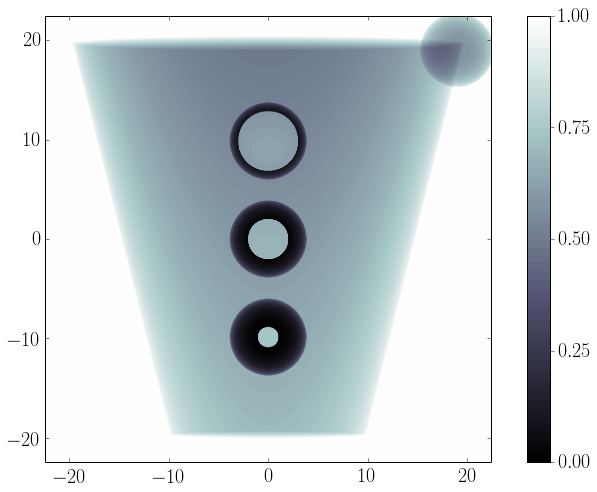

In [5]:
plt.contourf(y, x, v, 100, cmap=cm.bone)
plt.axes().set_aspect('equal') 
cbar = plt.colorbar(ticks=np.linspace(0.0, 1.0, 5, endpoint=True))
cbar.ax.tick_params(axis='y', direction='out')

plt.savefig('LA-UR-11-04757.png')